MERGE

In [1]:
import os
import shutil

In [2]:
def getAllFilesInDirectoryAndSubdirectories(directory):
    filelist = []

    for root, dirs, files in os.walk(directory):
        for file in files:
            filelist.append(os.path.join(root,file))
    return filelist

In [3]:
import glob
import shutil

def mergeOnlyPlans(sourceDirs, outDir):
  for sd in sourceDirs:
      for file in glob.glob(sd + "/*_explain.txt"):
          shutil.copy(file, outDir)
 

In [4]:
subDirs = [f.path for f in os.scandir("./out/runYan_basic_56GiBMem_OnlyPlan_CompJoinCosts_20230818/full/") if f.is_dir()]
subDirs

['./out/runYan_basic_56GiBMem_OnlyPlan_CompJoinCosts_20230818/full/3',
 './out/runYan_basic_56GiBMem_OnlyPlan_CompJoinCosts_20230818/full/5',
 './out/runYan_basic_56GiBMem_OnlyPlan_CompJoinCosts_20230818/full/4',
 './out/runYan_basic_56GiBMem_OnlyPlan_CompJoinCosts_20230818/full/1',
 './out/runYan_basic_56GiBMem_OnlyPlan_CompJoinCosts_20230818/full/2']

In [5]:
srcDirs = []
for dir in subDirs:
    srcDirs.append([x[0] for x in os.walk(dir)][1:])
    srcDirs[-1].sort()

srcDirs

[['./out/runYan_basic_56GiBMem_OnlyPlan_CompJoinCosts_20230818/full/3/2023-09-18_14:36:21.383985',
  './out/runYan_basic_56GiBMem_OnlyPlan_CompJoinCosts_20230818/full/3/2023-09-18_14:37:16.864226'],
 ['./out/runYan_basic_56GiBMem_OnlyPlan_CompJoinCosts_20230818/full/5/2023-09-18_14:37:52.337104',
  './out/runYan_basic_56GiBMem_OnlyPlan_CompJoinCosts_20230818/full/5/2023-09-18_14:38:47.431374'],
 ['./out/runYan_basic_56GiBMem_OnlyPlan_CompJoinCosts_20230818/full/4/2023-09-18_14:37:30.360969'],
 ['./out/runYan_basic_56GiBMem_OnlyPlan_CompJoinCosts_20230818/full/1/2023-09-18_14:33:17.124262',
  './out/runYan_basic_56GiBMem_OnlyPlan_CompJoinCosts_20230818/full/1/2023-09-18_14:34:13.567670'],
 ['./out/runYan_basic_56GiBMem_OnlyPlan_CompJoinCosts_20230818/full/2/2023-09-18_14:34:26.679344',
  './out/runYan_basic_56GiBMem_OnlyPlan_CompJoinCosts_20230818/full/2/2023-09-18_14:35:19.917119',
  './out/runYan_basic_56GiBMem_OnlyPlan_CompJoinCosts_20230818/full/2/2023-09-18_14:36:08.703308']]

In [6]:
subDirs2 = [f.path for f in os.scandir("./out/runYan_joinCosts_56GibMem_OnlyPlan_CompJoinCosts_202308118/full/") if f.is_dir()]
srcDirs2 = []
for dir in subDirs2:
    srcDirs2.append([x[0] for x in os.walk(dir)][1:])
    srcDirs2[-1].sort()

srcDirs2

[['./out/runYan_joinCosts_56GibMem_OnlyPlan_CompJoinCosts_202308118/full/3/2023-09-18_21:09:51.547455',
  './out/runYan_joinCosts_56GibMem_OnlyPlan_CompJoinCosts_202308118/full/3/2023-09-18_21:10:40.771218',
  './out/runYan_joinCosts_56GibMem_OnlyPlan_CompJoinCosts_202308118/full/3/2023-09-18_21:11:27.202604',
  './out/runYan_joinCosts_56GibMem_OnlyPlan_CompJoinCosts_202308118/full/3/2023-09-18_21:12:15.248852',
  './out/runYan_joinCosts_56GibMem_OnlyPlan_CompJoinCosts_202308118/full/3/2023-09-18_21:13:04.794538',
  './out/runYan_joinCosts_56GibMem_OnlyPlan_CompJoinCosts_202308118/full/3/2023-09-18_21:13:51.890504',
  './out/runYan_joinCosts_56GibMem_OnlyPlan_CompJoinCosts_202308118/full/3/2023-09-18_21:14:37.667845',
  './out/runYan_joinCosts_56GibMem_OnlyPlan_CompJoinCosts_202308118/full/3/2023-09-18_21:15:23.437037'],
 ['./out/runYan_joinCosts_56GibMem_OnlyPlan_CompJoinCosts_202308118/full/5/2023-09-18_21:17:29.838086',
  './out/runYan_joinCosts_56GibMem_OnlyPlan_CompJoinCosts_20230

In [7]:
from pathlib import Path
i = 1
for d in srcDirs:
    Path("./mergeout/basic/"+str(i)).mkdir(parents=True, exist_ok=True)
    mergeOnlyPlans(d, "./mergeout/basic/"+str(i))
    i = i + 1

In [8]:
i = 1
for d in srcDirs2:
    Path("./mergeout/joinCosts/"+str(i)).mkdir(parents=True, exist_ok=True)
    mergeOnlyPlans(d, "./mergeout/joinCosts/"+str(i))
    i = i + 1

EVALUATE

In [9]:
count1 = []
dirs = [f.path for f in os.scandir("./mergeout/basic/") if f.is_dir()]
dirs.sort()
basicCartesianSets = []
for d in dirs:
    querySet = set()
    for filename in glob.glob(d + "/*_explain.txt"):
        with open(filename) as file:
            lines = [line.rstrip() for line in file]
            lines = "\n".join(lines)
            if "CARTESIAN" in lines:
                querySet.add(filename.split("/")[-1].split("_")[0])

    basicCartesianSets.append(querySet)
    count1.append(len(querySet))
    
count1

[82, 82, 83, 80, 79]

In [10]:
basicCartesianSets

[{'09ac',
  '11al',
  '12am',
  '13aa',
  '13an',
  '14ai',
  '14am',
  '15an',
  '16al',
  '16am',
  '16ao',
  '17ab',
  '17ag',
  '18aj',
  '18an',
  '19ad',
  '19ak',
  '20ag',
  '21aa',
  '21ab',
  '21ad',
  '21ah',
  '21am',
  '22ak',
  '22am',
  '23ae',
  '23af',
  '23ag',
  '23aj',
  '23al',
  '23an',
  '23ao',
  '24ac',
  '24ad',
  '24ae',
  '24ah',
  '24ak',
  '24an',
  '25aa',
  '25ai',
  '25ao',
  '26ae',
  '26ag',
  '26aj',
  '26ak',
  '26an',
  '26ao',
  '27aa',
  '27ab',
  '27ac',
  '27ad',
  '27ag',
  '27ai',
  '27aj',
  '27ak',
  '27an',
  '27ao',
  '28aa',
  '28ac',
  '28ad',
  '28af',
  '28ag',
  '28ah',
  '28an',
  '28ao',
  '29ab',
  '29ac',
  '29af',
  '29ag',
  '29ai',
  '29al',
  '29am',
  '29an',
  '29ao',
  '30aa',
  '30ab',
  '30ad',
  '30af',
  '30ah',
  '30ai',
  '30an',
  '30ao'},
 {'09ac',
  '11ag',
  '12am',
  '13aa',
  '13an',
  '14ai',
  '14am',
  '15an',
  '16al',
  '16am',
  '16ao',
  '17ab',
  '17ag',
  '18aj',
  '18an',
  '19ad',
  '19ak',
  '20ag',

In [11]:
count2 = []
dirs = [f.path for f in os.scandir("./mergeout/joinCosts/") if f.is_dir()]
dirs.sort()
joinCostsCartesianSets = []
for d in dirs:
    querySet = set()
    for filename in glob.glob(d + "/*_explain.txt"):
        with open(filename) as file:
            lines = [line.rstrip() for line in file]
            lines = "\n".join(lines)
            if "CARTESIAN" in lines:
                querySet.add(filename.split("/")[-1].split("_")[0])

    joinCostsCartesianSets.append(querySet)
    count2.append(len(querySet))

count2

[22, 21, 25, 23, 23]

In [12]:
joinCostsCartesianSets

[{'17ab',
  '20ag',
  '21ah',
  '21am',
  '22ak',
  '23al',
  '24ad',
  '24ae',
  '26an',
  '27ao',
  '28aa',
  '28ad',
  '28af',
  '28an',
  '29af',
  '29al',
  '29am',
  '29an',
  '29ao',
  '30aa',
  '30ah',
  '30ao'},
 {'20ag',
  '21ah',
  '21am',
  '22ak',
  '23al',
  '24ad',
  '24ae',
  '25aa',
  '27ak',
  '27ao',
  '28aa',
  '28ad',
  '28af',
  '28an',
  '29af',
  '29al',
  '29am',
  '29an',
  '29ao',
  '30aa',
  '30ao'},
 {'18an',
  '19ad',
  '20ag',
  '21ah',
  '21am',
  '22ak',
  '23al',
  '24ad',
  '24ae',
  '26ae',
  '27ag',
  '27ao',
  '28aa',
  '28ac',
  '28ad',
  '28af',
  '28an',
  '29ac',
  '29al',
  '29am',
  '29an',
  '29ao',
  '30aa',
  '30ah',
  '30ai'},
 {'20ag',
  '21ah',
  '21am',
  '22ak',
  '22am',
  '23al',
  '24ad',
  '24ae',
  '27aa',
  '27ac',
  '27ao',
  '28aa',
  '28ad',
  '28af',
  '28an',
  '29al',
  '29am',
  '29an',
  '29ao',
  '30aa',
  '30ah',
  '30ai',
  '30ao'},
 {'16al',
  '20ag',
  '21ah',
  '21am',
  '22ak',
  '23al',
  '24ad',
  '24ae',
  '26a

Evaluations / Graphics

In [13]:
import matplotlib.pyplot as plt
import numpy as np

In [14]:
def barChart(labels, values, colors, ylabel, title, pathtoSave):
    fig, ax = plt.subplots()

    ax.bar(labels, values, color=colors)#, colors = ["tab:blue" for e in values])#label=bar_labels, color=bar_colors)

    for i in range(len(labels)):
        plt.text(i, values[i] + 1, values[i], ha = 'center')

    ax.set_ylabel(ylabel)
    ax.set_title(title)
    #ax.legend(title=title)

    plt.savefig(pathtoSave)
    plt.show()

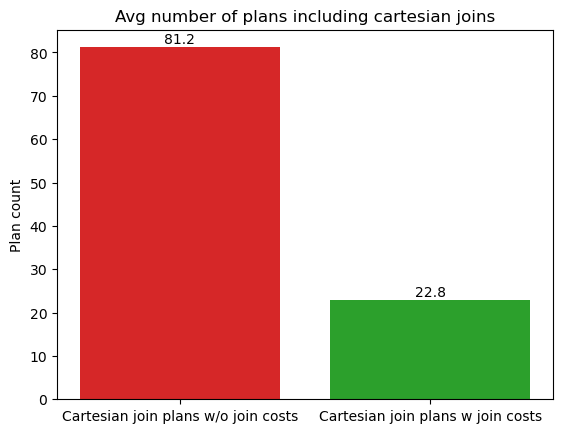

In [15]:
barChart(["Cartesian join plans w/o join costs", "Cartesian join plans w join costs"], [np.average(count1), np.average(count2)], ["tab:red", "tab:green"], "Plan count", "Avg number of plans including cartesian joins", "./plot.png")